# Stichted Data bottle

## Kelp vs. Squid Ink

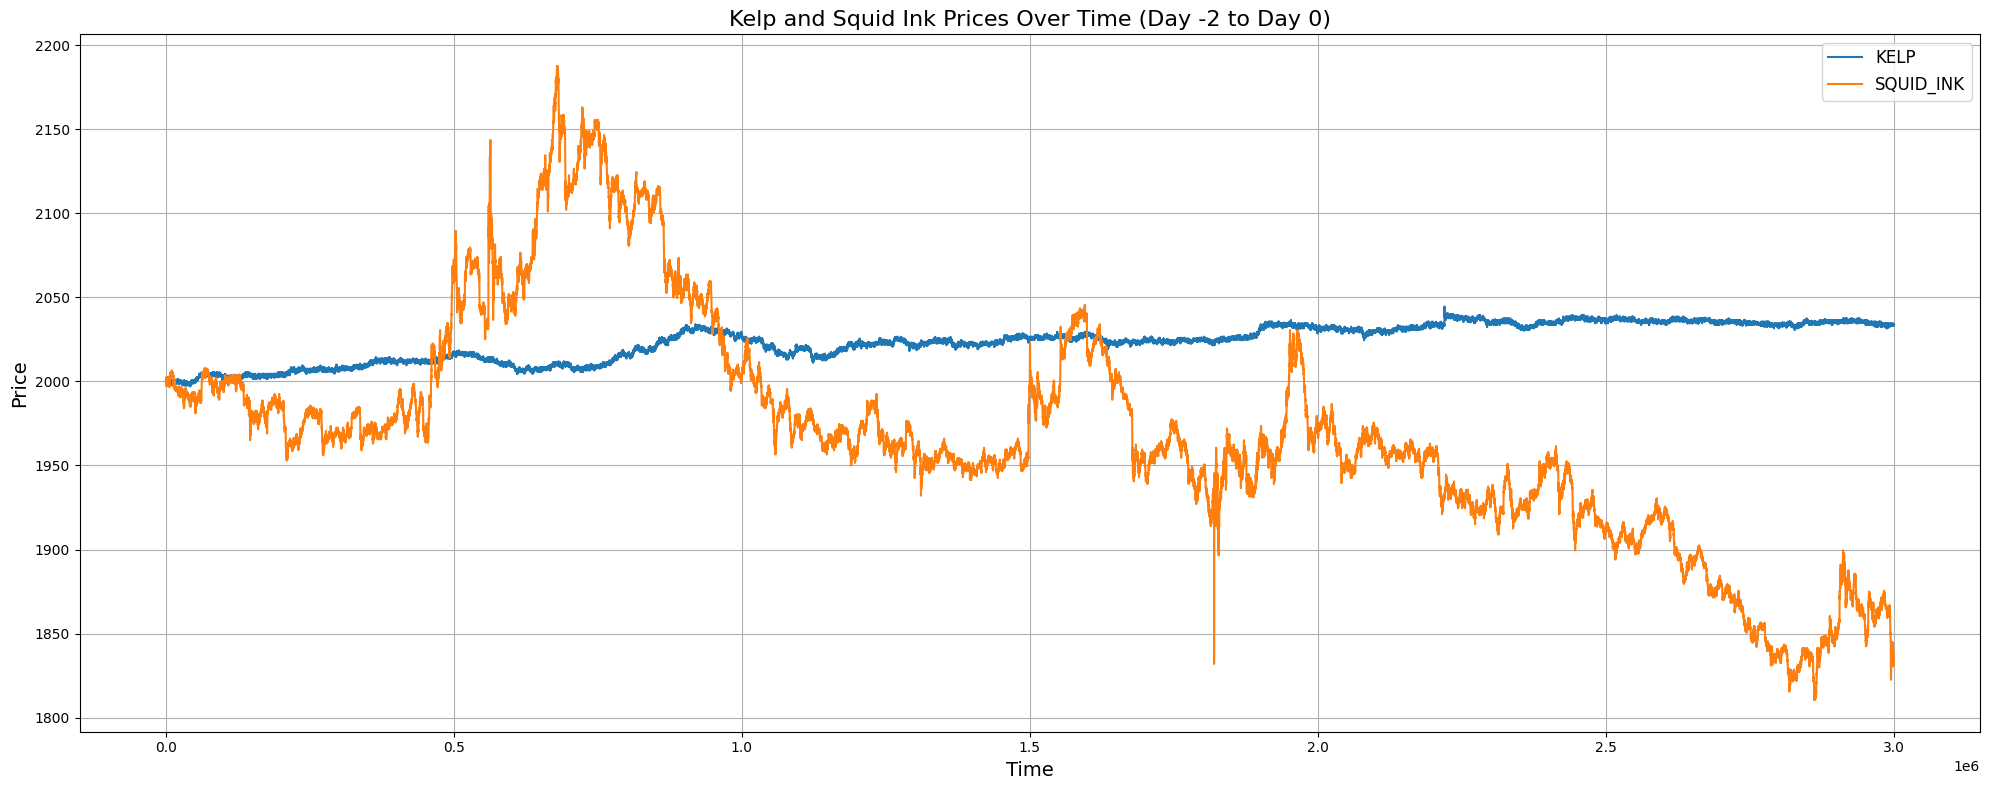

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSVs with proper delimiter
day_minus_2 = pd.read_csv("/Users/kgawande/Documents/Projects/aura-farmers/Round 1/round-1-island-data-bottle/prices_round_1_day_-2.csv", delimiter=';')
day_minus_1 = pd.read_csv("/Users/kgawande/Documents/Projects/aura-farmers/Round 1/round-1-island-data-bottle/prices_round_1_day_-1.csv", delimiter=';')
day_0 = pd.read_csv("/Users/kgawande/Documents/Projects/aura-farmers/Round 1/round-1-island-data-bottle/prices_round_1_day_0.csv", delimiter=';')

# Combine all data
all_days = pd.concat([day_minus_2, day_minus_1, day_0], ignore_index=True)

# Compute absolute time
all_days["day"] = all_days["day"].astype(int)
all_days["timestamp"] = all_days["timestamp"].astype(int)
all_days["absolute_time"] = all_days["timestamp"] + (all_days["day"] + 2) * 1_000_000

# Pivot so each product has its own line
pivot_df = all_days.pivot(index="absolute_time", columns="product", values="mid_price")

# Plot only Kelp and Squid Ink
plt.figure(figsize=(20, 8))
for product in ["KELP", "SQUID_INK"]:
    plt.plot(pivot_df.index, pivot_df[product], label=product)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.title("Kelp and Squid Ink Prices Over Time (Day -2 to Day 0)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


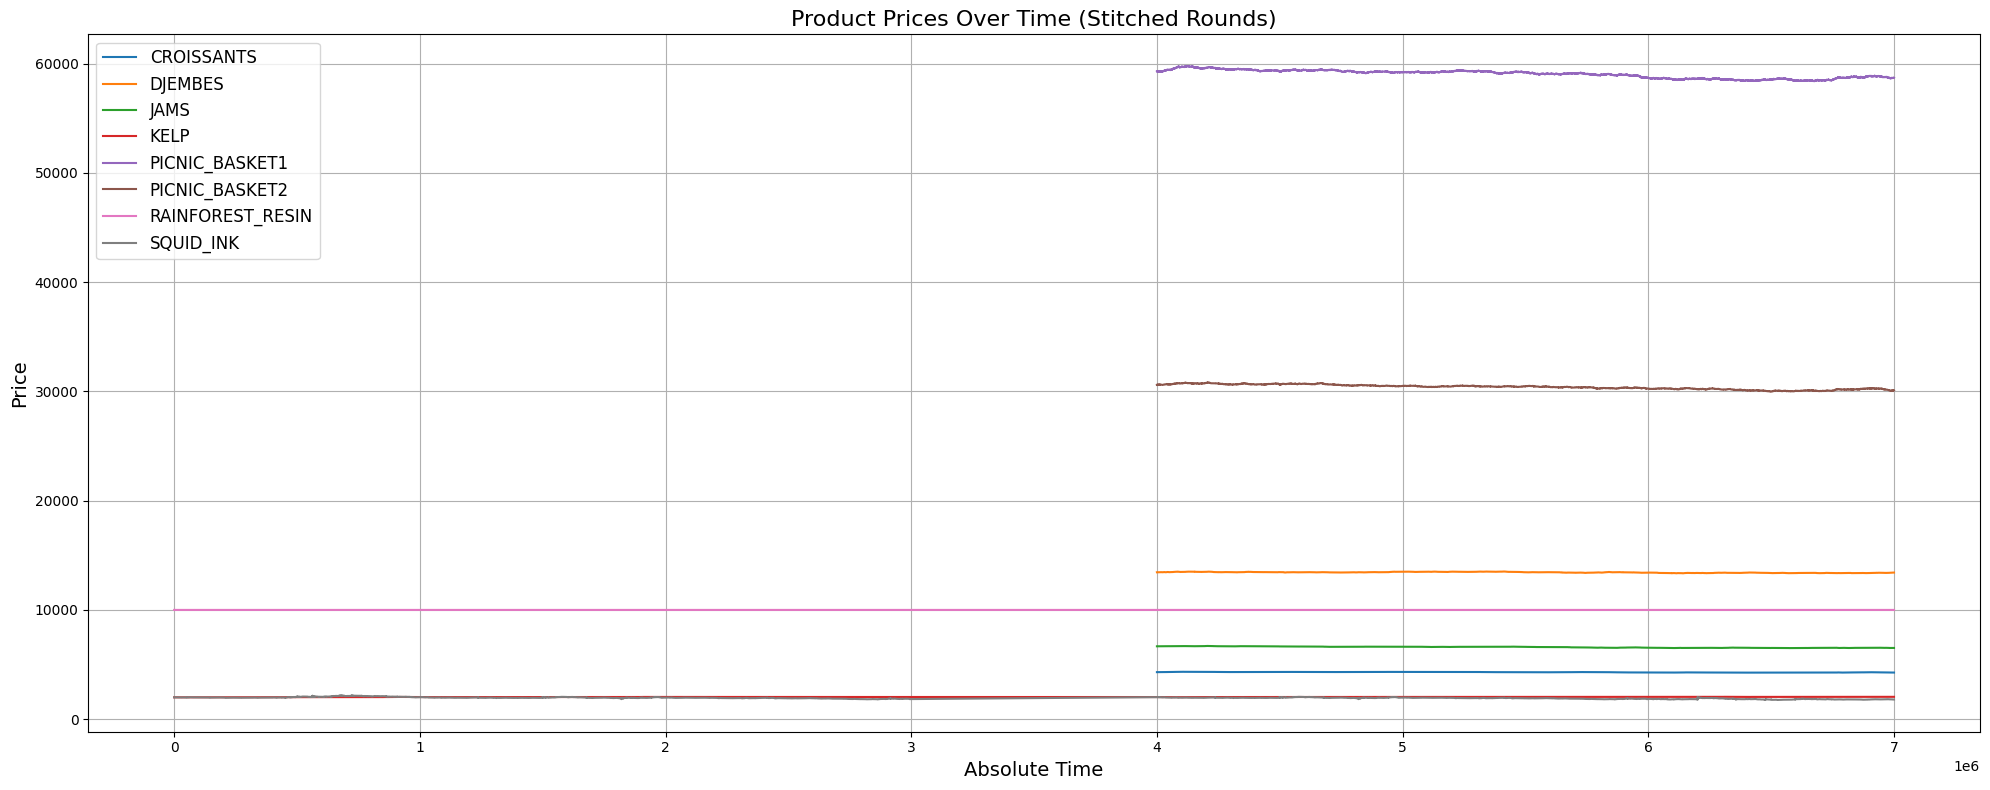

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------- ROUND 1 DATA --------------
# Load Round 1 CSVs with proper delimiter
day_minus_2 = pd.read_csv("/Users/kgawande/Documents/Projects/aura-farmers/Round 1/round-1-island-data-bottle/prices_round_1_day_-2.csv", delimiter=';')
day_minus_1 = pd.read_csv("/Users/kgawande/Documents/Projects/aura-farmers/Round 1/round-1-island-data-bottle/prices_round_1_day_-1.csv", delimiter=';')
day_0 = pd.read_csv("/Users/kgawande/Documents/Projects/aura-farmers/Round 1/round-1-island-data-bottle/prices_round_1_day_0.csv", delimiter=';')

# Combine all Round 1 data
all_days = pd.concat([day_minus_2, day_minus_1, day_0], ignore_index=True)

# Compute absolute time for Round 1
# (day + 2) shifts negative day values so that the multiplier is positive.
all_days["day"] = all_days["day"].astype(int)
all_days["timestamp"] = all_days["timestamp"].astype(int)
all_days["absolute_time"] = all_days["timestamp"] + (all_days["day"] + 2) * 1_000_000

# ---------- ROUND 2 DATA --------------
# Load Round 2 CSVs with proper delimiter
day_minus1_r2 = pd.read_csv("/Users/kgawande/Documents/Projects/aura-farmers/Round 2/round-2-island-data-bottle/prices_round_2_day_-1.csv", delimiter=';')
day0_r2 = pd.read_csv("/Users/kgawande/Documents/Projects/aura-farmers/Round 2/round-2-island-data-bottle/prices_round_2_day_0.csv", delimiter=';')
day1_r2 = pd.read_csv("/Users/kgawande/Documents/Projects/aura-farmers/Round 2/round-2-island-data-bottle/prices_round_2_day_1.csv", delimiter=';')

# Combine all Round 2 data
round2 = pd.concat([day_minus1_r2, day0_r2, day1_r2], ignore_index=True)

# Compute absolute time for Round 2.
# Since the Round 2 days are -1, 0, 1, we use (day + 1) as the base.
round2["day"] = round2["day"].astype(int)
round2["timestamp"] = round2["timestamp"].astype(int)
round2["absolute_time"] = round2["timestamp"] + (round2["day"] + 1) * 1_000_000

# Shift Round 2's absolute time so that these data points appear after those from Round 1.
offset = all_days["absolute_time"].max() + 1_000_000  # add a 1,000,000 gap
round2["absolute_time"] += offset

# ---------- STITCHING AND PLOTTING --------------
# Combine Round 1 and Round 2 data
all_rounds = pd.concat([all_days, round2], ignore_index=True)

# Pivot so each product has its own time series line
pivot_df = all_rounds.pivot(index="absolute_time", columns="product", values="mid_price")

# Plot all products over time
plt.figure(figsize=(20, 8))
for product in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[product], label=product)

plt.xlabel("Absolute Time", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.title("Product Prices Over Time (Stitched Rounds)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


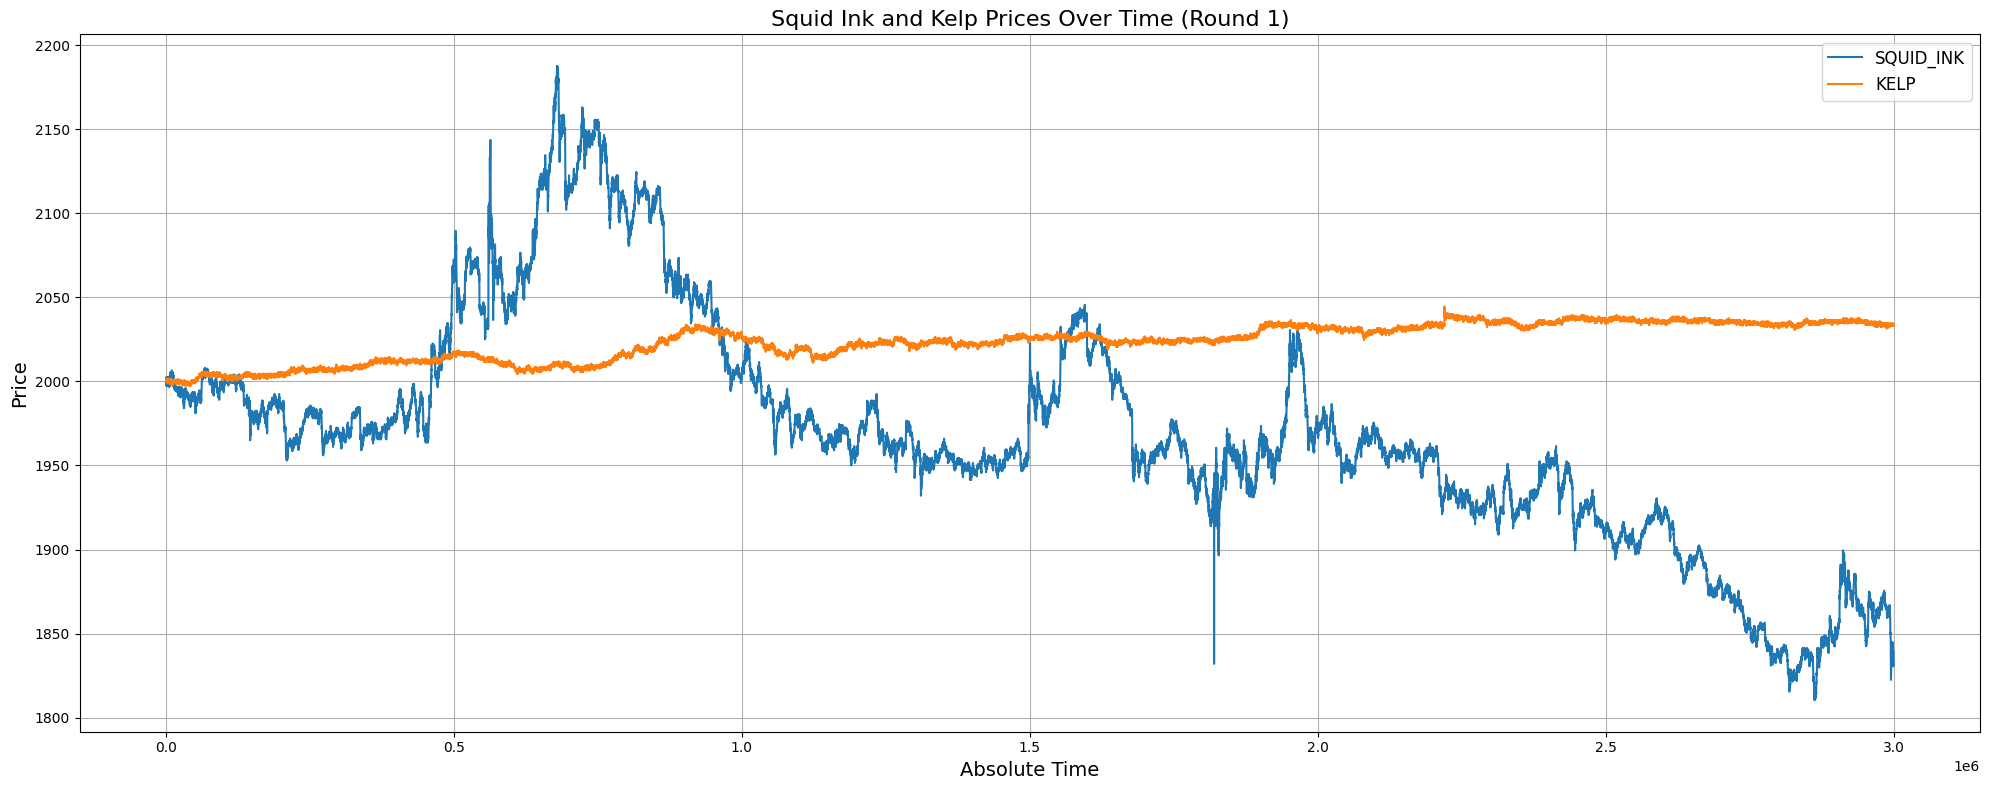

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------- ROUND 1 DATA --------------
# Load Round 1 CSVs with proper delimiter
day_minus_2 = pd.read_csv("/Users/kgawande/Documents/Projects/aura-farmers/Round 1/round-1-island-data-bottle/prices_round_1_day_-2.csv", delimiter=';')
day_minus_1 = pd.read_csv("/Users/kgawande/Documents/Projects/aura-farmers/Round 1/round-1-island-data-bottle/prices_round_1_day_-1.csv", delimiter=';')
day_0       = pd.read_csv("/Users/kgawande/Documents/Projects/aura-farmers/Round 1/round-1-island-data-bottle/prices_round_1_day_0.csv", delimiter=';')

# Combine all Round 1 data
all_days = pd.concat([day_minus_2, day_minus_1, day_0], ignore_index=True)

# Compute absolute time for Round 1
# (day + 2) shifts negative day values so that the multiplier is positive.
all_days["day"] = all_days["day"].astype(int)
all_days["timestamp"] = all_days["timestamp"].astype(int)
all_days["absolute_time"] = all_days["timestamp"] + (all_days["day"] + 2) * 1_000_000

# Pivot so that each product is a separate column
pivot_df = all_days.pivot(index="absolute_time", columns="product", values="mid_price")

# Plot Squid Ink and Kelp
plt.figure(figsize=(20, 8))
for product in ["SQUID_INK", "KELP"]:
    if product in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[product], label=product)
    else:
        print(f"Warning: {product} not found in the data.")

plt.xlabel("Absolute Time", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.title("Squid Ink and Kelp Prices Over Time (Round 1)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


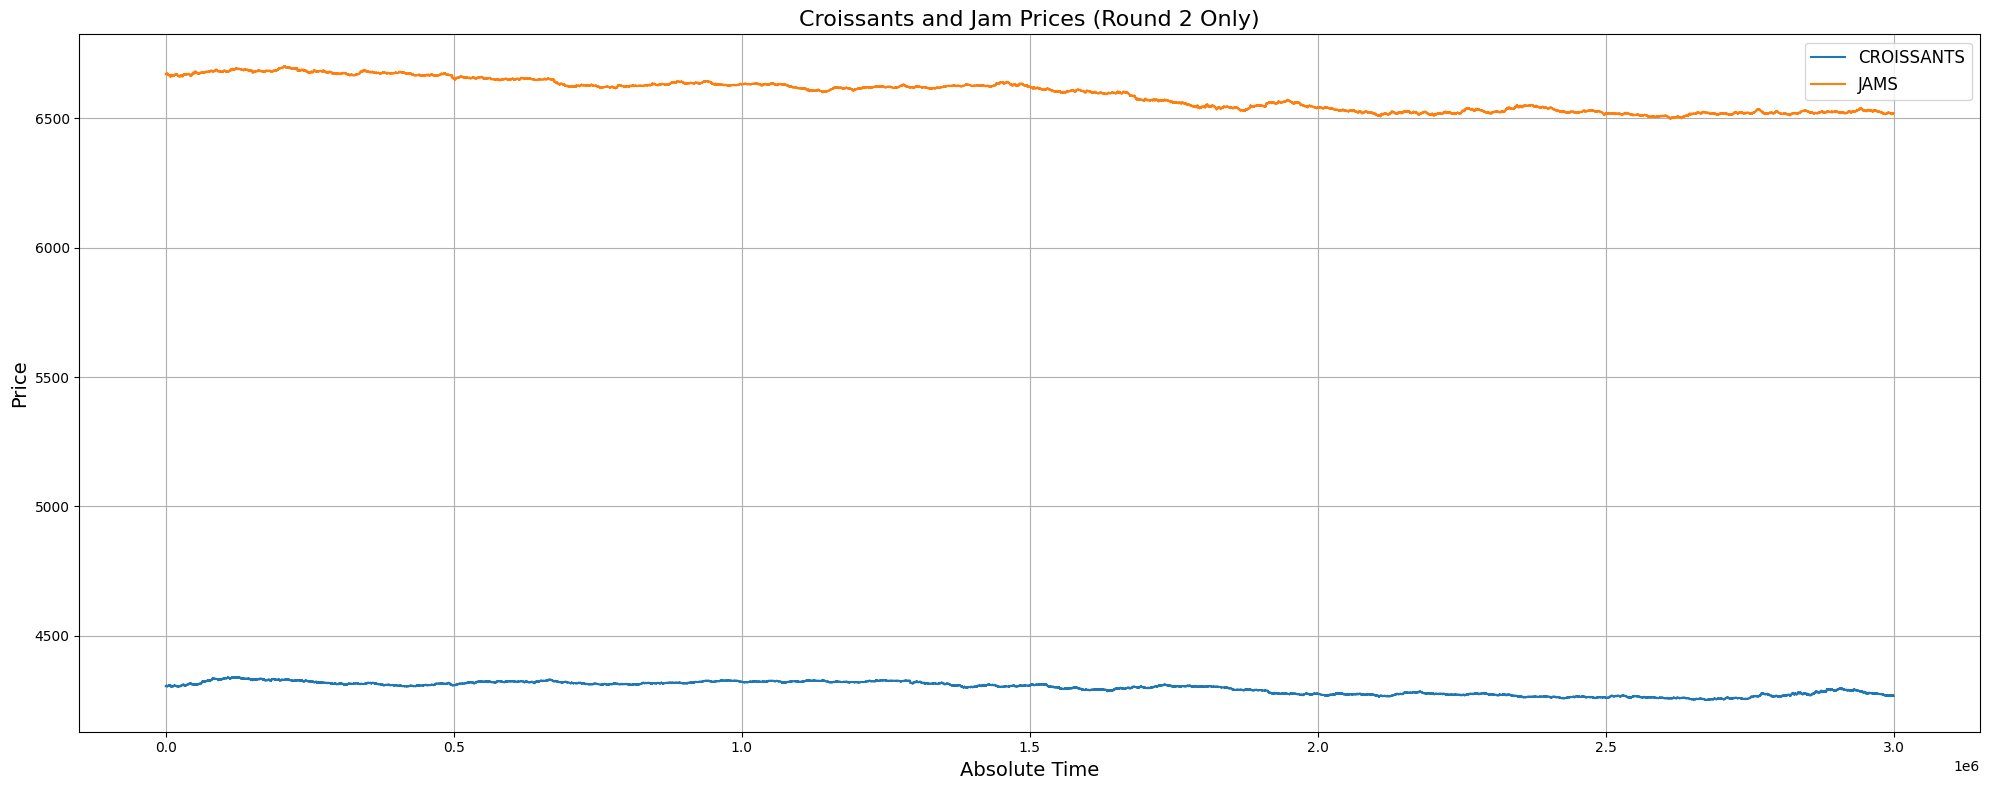

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------- ROUND 2 DATA ONLY --------------
# Load Round 2 CSVs with proper delimiter
day_minus1_r2 = pd.read_csv("/Users/kgawande/Documents/Projects/aura-farmers/Round 2/round-2-island-data-bottle/prices_round_2_day_-1.csv", delimiter=';')
day0_r2       = pd.read_csv("/Users/kgawande/Documents/Projects/aura-farmers/Round 2/round-2-island-data-bottle/prices_round_2_day_0.csv", delimiter=';')
day1_r2       = pd.read_csv("/Users/kgawande/Documents/Projects/aura-farmers/Round 2/round-2-island-data-bottle/prices_round_2_day_1.csv", delimiter=';')

# Combine all Round 2 data
round2 = pd.concat([day_minus1_r2, day0_r2, day1_r2], ignore_index=True)

# Compute absolute time for Round 2
round2["day"] = round2["day"].astype(int)
round2["timestamp"] = round2["timestamp"].astype(int)
round2["absolute_time"] = round2["timestamp"] + (round2["day"] + 1) * 1_000_000

# Pivot so each product is a separate column
pivot_df = round2.pivot(index="absolute_time", columns="product", values="mid_price")

# Plot only Croissants and Jam (adjust the names to match your data)
plt.figure(figsize=(20, 8))
products_to_plot = ["CROISSANTS", "JAMS"]  # or ["CROISSANT", "JAM"] if that's what's in your CSV
for product in products_to_plot:
    if product in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[product], label=product)
    else:
        print(f"Warning: {product} not found in the data. Check pivot_df.columns for the actual name.")

plt.xlabel("Absolute Time", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.title("Croissants and Jam Prices (Round 2 Only)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
